## flexible neural network-digit-recognizer :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# Optimization module in scipy
from scipy import optimize
 
# will be used to load MATLAB mat datafile format
from scipy.io import loadmat
 
# library written for this exercise providing additional functions for assignment submission, and others
import utils
%matplotlib inline

In [2]:
#  training data stored in arrays X, y
data = loadmat('Data/ex4data1.mat')
X, y = data['X'], data['y'].ravel()
y[y == 10] = 0
# get number of examples in dataset
m = y.size

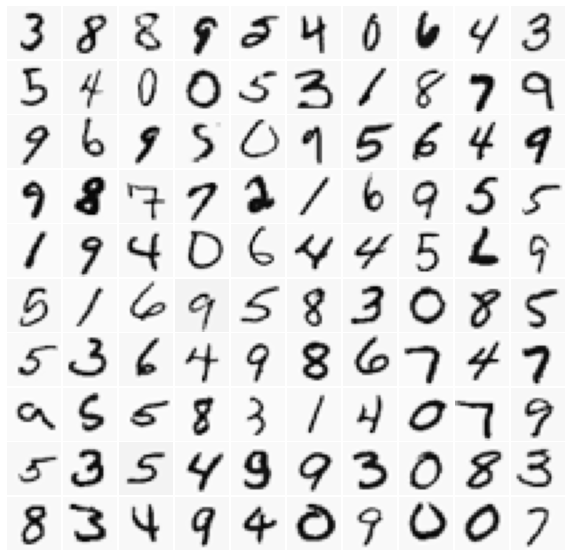

In [3]:
# Randomly select 100 data points to display
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]
 
utils.displayData(sel)

In [4]:
test_size = 5000/21
train_size = (5000-test_size)/5000
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=train_size, random_state=2)

In [5]:
X_train = X_train.T

# **> Let's build our Flex NN :**

In [6]:
def one(Y):
    one_Y = np.zeros((Y.size, int(Y.max()) + 1))
    one_Y[np.arange(Y.size), Y] = 1
    one_Y = one_Y.T
    return one_Y
def tanH(x):
    return np.tanh(x)
def deriv_tanH(x):
    return 1-np.tanh(x)**2
        
def softmax(Z):
    return (np.exp(Z) / sum(np.exp(Z)))
def softmax_grad(softmax):
    # Reshape the 1-d softmax to 2-d so that np.dot will do the matrix multiplication
    s = softmax.reshape(-1,1)
    return np.diagflat(s) - np.dot(s, s.T)

In [7]:
    
class Layer :
    def _init_(self,size):
        self.size = size 
    def _initWeights_(self, parBef, parAct):
        self.weights = np.random.rand(parAct, parBef) - 0.5
        self.biais = np.random.rand(parAct, 1) - 0.5
    def updateNodes(self,A):
        self.A = A
        #print("The new Values of nodes are : ",A.shape)
    def updateWeights(self,W,b):
        self.weights = W
        self.biais = b

In [23]:
class NeuralNetwork:
    Layers = []
    Z, dZ, dW, dB=[],[],[],[]
    def _init_(self, L):
        self.cL = len(L)
        #self.m ,self.n = data.shape
        
    def add_Layer(self,layer):
        self.Layers.append(layer)
        print("Layer ",len(self.Layers)," is added.\nit has :",layer.size," nodes")    
    def forward_prop(self,X):
        self.Layers[0].updateNodes(X)
        #self.Z.append(X)
        for i in range(1,len(self.Layers)-1):  
            layer = self.Layers[i-1]
            Zi=layer.weights.dot(layer.A)+layer.biais
            #print(Zi)
            self.Z.append(Zi)
            A = tanH(Zi)
            self.Layers[i].updateNodes(A)
        Y = self.Layers[-2].weights.dot(self.Layers[-2].A)+self.Layers[-2].biais
        self.Z.append(Y)
        A = softmax(Y)
        #print(A)
        self.Layers[-1].updateNodes(A)
        return A
    def BackPropLastLayer(self,Y, m):
        dZ = self.Layers[-1].A - one(Y)
        dW = 1/m * dZ.dot(self.Layers[-2].A.T)
        db = 1/m * np.sum(dZ)
        return dZ,dW,db
    def BackpropHiddenLayers(self,dZA,Z,A,Theta,m):
        dZ = Theta.T.dot(dZA) * deriv_tanH(Z)
        dW = 1/m * dZ.dot(A.T)
        #print("dZ :",dZ.shape)
        db = 1/m * np.sum(dZ)
        return dZ,dW, db
    def get_predictions(self):
        return np.argmax(self.Layers[-1].A, 0)
    def get_accuracy(self, Y):
        print(self.get_predictions(), Y)
        return np.sum(self.get_predictions() == Y) / Y.size
    def gradient_descent(self, X, Y, iter, alpha,m):
        for i in range(iter):
            self.Z,self.dZ, self.dW,self.dB=[],[],[],[]
            self.forward_prop(X)
            dZ,dW,db = self.BackPropLastLayer(Y,m)
            #print("dZ ",i,":",dZ.shape,"dW :",dW.shape,"db : ",db)
            self.dZ.append(dZ)
            self.dW.append(dW)
            self.dB.append(db)
            for j in reversed(range(1,len(self.Layers)-1)):
                #New_NN1.BackpropHiddenLayers(dZA,Z,New_NN1.Layers[-2].A,New_NN1.Layers[-2].weights,239)
                dZ,dW,db = self.BackpropHiddenLayers(self.dZ[-1],self.Z[j-1],self.Layers[j-1].A,New_NN1.Layers[j].weights,m)
                self.dZ.append(dZ)
                self.dW.append(dW)
                self.dB.append(db)
                #print("dZ :",dZ.shape,"db : ",db)
            #print(len(self.dZ),len(self.dW),len(self.dB))
            #print(self.dB)
            c = -1
            for layer in reversed(self.Layers):
                c+=1
                if c <= 0 : pass
                else : 
                    layer.updateWeights(layer.weights-self.dW[c-1],layer.biais-self.dB[c-1])
                    #print(layer.weights.shape,layer.biais.shape)
            if i % 10 == 0:
                print("Iteration: ", i)
                predictions = self.get_predictions()
                print(self.get_accuracy(Y))
                print("--------------------------------")
    def predict(self,X):
        return self.forward_prop(X)
    def test_prediction(self,index):
        current_image = X_train[:, index, None]
        prediction = self.predict(X_train[:, index, None])
        label = Y_train[index]
        print("Prediction: ", prediction)
        print("Label: ", label)
        current_image = current_image.reshape((20, 20)) * 255
        plt.gray()
        rotated= np.rot90(current_image, 1)
        plt.imshow(np.flipud(rotated))
        plt.show()    

In [24]:
def make_nn(L):
    New_NN = NeuralNetwork()
    New_NN._init_(L)
    for i in range(len(L)):
        layer = Layer()
        layer._init_(L[i])
        if i<len(L)-1: layer._initWeights_(L[i],L[i+1])
        New_NN.add_Layer(layer)
    return New_NN

In [25]:
nb_features, nb_output = 400, 10
L =[nb_features, 12,13,nb_output]

In [26]:
New_NN1 = NeuralNetwork()
New_NN1 = make_nn(L)
New_NN1.Layers

Layer  1  is added.
it has : 400  nodes
Layer  2  is added.
it has : 12  nodes
Layer  3  is added.
it has : 13  nodes
Layer  4  is added.
it has : 10  nodes


In [21]:
#gradient_descent(self, X, Y, iter, alpha,m)
New_NN1.gradient_descent(X_train,Y_train,5000,0.1,41000)

Iteration:  0
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.939928586431422
--------------------------------
Iteration:  10
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9405587061541693
--------------------------------
Iteration:  20
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9407687460617518
--------------------------------
Iteration:  30
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9416089056920814
--------------------------------
Iteration:  40
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.941398865784499
--------------------------------
Iteration:  50
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9416089056920814
--------------------------------
Iteration:  60
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.941398865784499
--------------------------------
Iteration:  70
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9416089056920814
--------------------------------
Iteration:  80
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.941818945599664
--------------------------------
Iteration:  90
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9422390254148288
--------

Iteration:  790
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9584120982986768
--------------------------------
Iteration:  800
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9586221382062592
--------------------------------
Iteration:  810
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9588321781138416
--------------------------------
Iteration:  820
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9588321781138416
--------------------------------
Iteration:  830
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9588321781138416
--------------------------------
Iteration:  840
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9590422180214241
--------------------------------
Iteration:  850
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.959462297836589
--------------------------------
Iteration:  860
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9596723377441714
--------------------------------
Iteration:  870
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9596723377441714
--------------------------------
Iteration:  880
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.95967233774

Iteration:  1580
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9689140936777988
--------------------------------
Iteration:  1590
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9691241335853812
--------------------------------
Iteration:  1600
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9691241335853812
--------------------------------
Iteration:  1610
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9691241335853812
--------------------------------
Iteration:  1620
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9691241335853812
--------------------------------
Iteration:  1630
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9691241335853812
--------------------------------
Iteration:  1640
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9693341734929637
--------------------------------
Iteration:  1650
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9693341734929637
--------------------------------
Iteration:  1660
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9693341734929637
--------------------------------
Iteration:  1670
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.

Iteration:  2370
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9760554505356017
--------------------------------
Iteration:  2380
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9760554505356017
--------------------------------
Iteration:  2390
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9762654904431842
--------------------------------
Iteration:  2400
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9764755303507666
--------------------------------
Iteration:  2410
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9764755303507666
--------------------------------
Iteration:  2420
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9764755303507666
--------------------------------
Iteration:  2430
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9764755303507666
--------------------------------
Iteration:  2440
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9764755303507666
--------------------------------
Iteration:  2450
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9764755303507666
--------------------------------
Iteration:  2460
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.

Iteration:  3160
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9789960092417559
--------------------------------
Iteration:  3170
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9792060491493384
--------------------------------
Iteration:  3180
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9792060491493384
--------------------------------
Iteration:  3190
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9792060491493384
--------------------------------
Iteration:  3200
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9794160890569208
--------------------------------
Iteration:  3210
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9796261289645033
--------------------------------
Iteration:  3220
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9798361688720857
--------------------------------
Iteration:  3230
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9800462087796681
--------------------------------
Iteration:  3240
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9800462087796681
--------------------------------
Iteration:  3250
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.

Iteration:  3950
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.983826927116152
--------------------------------
Iteration:  3960
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.983826927116152
--------------------------------
Iteration:  3970
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.983826927116152
--------------------------------
Iteration:  3980
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.983826927116152
--------------------------------
Iteration:  3990
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9840369670237346
--------------------------------
Iteration:  4000
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9840369670237346
--------------------------------
Iteration:  4010
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9840369670237346
--------------------------------
Iteration:  4020
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9840369670237346
--------------------------------
Iteration:  4030
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.984247006931317
--------------------------------
Iteration:  4040
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.98424

Iteration:  4740
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9871875656374711
--------------------------------
Iteration:  4750
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9871875656374711
--------------------------------
Iteration:  4760
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9871875656374711
--------------------------------
Iteration:  4770
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9871875656374711
--------------------------------
Iteration:  4780
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9871875656374711
--------------------------------
Iteration:  4790
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9871875656374711
--------------------------------
Iteration:  4800
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.987607645452636
--------------------------------
Iteration:  4810
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9878176853602184
--------------------------------
Iteration:  4820
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9878176853602184
--------------------------------
Iteration:  4830
[6 7 9 ... 5 7 5] [6 7 9 ... 5 7 5]
0.9

### Training Set Accuracy: 98.8%

## Test with some images :

Prediction:  [[0.14302955]
 [0.19187407]
 [0.05142793]
 [0.14275385]
 [0.03412644]
 [0.03463396]
 [0.12754931]
 [0.14437659]
 [0.06635377]
 [0.06387454]]
Label:  3


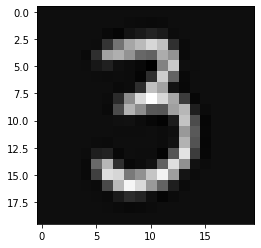

In [35]:
test_prediction(New_NN1,25)

Prediction:  [[0.05262013]
 [0.13688483]
 [0.2103921 ]
 [0.09149529]
 [0.06687776]
 [0.13121218]
 [0.05858708]
 [0.13774569]
 [0.06843542]
 [0.04574951]]
Label:  5


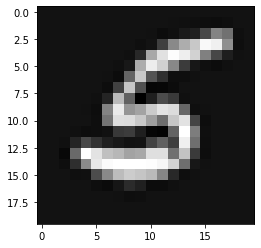

In [36]:
test_prediction(New_NN1,56)

Prediction:  [[0.08558881]
 [0.08372079]
 [0.10649073]
 [0.15796383]
 [0.15468409]
 [0.1503097 ]
 [0.03948594]
 [0.12401666]
 [0.06697523]
 [0.03076423]]
Label:  7


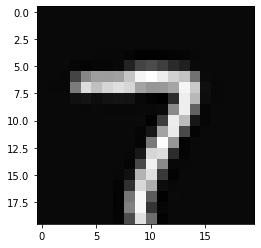

In [37]:
test_prediction(New_NN1,50)

Prediction:  [[0.03559755]
 [0.05667421]
 [0.21193698]
 [0.06659318]
 [0.12480531]
 [0.16091618]
 [0.05052308]
 [0.11625781]
 [0.09324306]
 [0.08345265]]
Label:  9


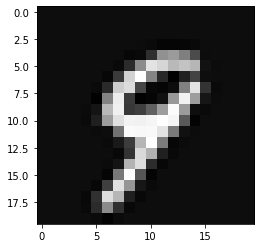

In [38]:
test_prediction(New_NN1,2)

Prediction:  [[0.02992291]
 [0.06282178]
 [0.23773851]
 [0.04013846]
 [0.09908692]
 [0.19146117]
 [0.11169392]
 [0.11816137]
 [0.07599766]
 [0.03297731]]
Label:  4


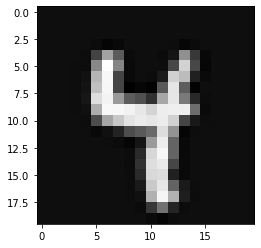

In [39]:
test_prediction(New_NN1,100)

Prediction:  [[0.07958495]
 [0.12408702]
 [0.09111736]
 [0.10320479]
 [0.08053623]
 [0.07405397]
 [0.15368387]
 [0.14437531]
 [0.09634436]
 [0.05301214]]
Label:  8


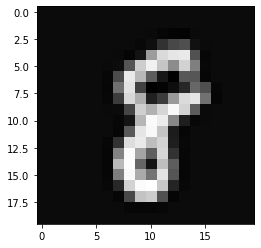

In [40]:
test_prediction(New_NN1,30)